## INFO 2950 Project 
### Appendix 1 - Data Cleaning 
Net IDs: tjk223, bsp73, amm643, swp42

Names: Teddy Klausner, Ben Polson, Sasha Miranda, Spencer Pettee
### Details
This file shows the data cleaning we performed on our datasets. We had two datasets for this projects, both of them have information from across the globe. The first of the datasets involves information on internet accessability in different countries. The second dataset is about food expenditures and is specific to 2017.

In [1]:
## Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Load data files
df1 = pd.read_csv('3i-index-data.csv', encoding= 'latin-1')
df1.head()

,ISO,Country/Group,1.1.1) Internet users / % of households,1.1.2) Fixed-line broadband subscribers / Per 100 inhabitants,1.1.3) Mobile subscribers / Per 100 inhabitants,1.1.4) Gender gap in internet access / % difference,1.1.5) Gender gap in mobile phone access / % difference,1.2.1) Average fixed broadband upload speed / Kbps,1.2.2) Average fixed broadband download speed / Kbps,1.2.3) Average fixed broadband latency / ms,...,BG15) Internet users (population) / Millions,BG16) Offline population / Millions,BG17) Internet access gender gap / Difference in percentage points,BG18) Mobile phone access gender gap / Difference in percentage points,BG19) Internet users (percent of population) / % of population,BG20) Male internet users / % of male population,BG21) Female internet users / % of female population,BG22) Male mobile phone subscribers / % of male population,BG23) Female mobile phone subscribers / % of female population,BG24) Total fixed line broadband subscribers / Number of subscriptions
0,DZ,Algeria,74.4,7.26,121.9,21.7,7.3,2090.0,3990.0,64.0,...,25.16,17.07,13.0,6.0,59.6,60.0,47.0,82.0,76.0,3063835.0
1,AR,Argentina,75.9,19.10,130.0,-5.7,-3.6,7960.0,33960.0,31.0,...,32.64,11.29,-4.0,-3.0,74.3,70.0,74.0,83.0,86.0,8473655.0
2,AU,Australia,86.1,32.22,113.6,2.1,2.2,20030.0,42630.0,24.0,...,21.28,3.31,2.0,2.0,86.5,94.0,92.0,93.0,91.0,7922000.0
3,AT,Austria,88.8,28.35,123.5,2.2,-1.0,16920.0,55030.0,20.0,...,7.80,1.09,2.0,-1.0,87.7,91.0,89.0,96.0,97.0,2521000.0
4,AZ,Azerbaijan,78.2,18.20,103.9,15.0,11.5,23490.0,21200.0,31.0,...,7.94,2.01,12.0,11.0,79.8,80.0,68.0,96.0,85.0,1810474.0


### Data Exploration  - Internet Data
Now for an initial exploration of the data we will examine a few plots to look for any trends and other interesting features. This will help us gauge how we should further clean the data and may also help us to see what columns we would like to use. 

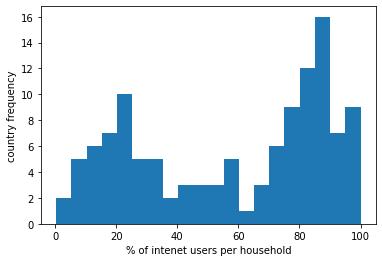

In [3]:
## Histogram of Internet users by household 
plt.hist(df1['1.1.1) Internet users / % of households'], bins=20)
plt.xlabel('% of intenet users per household')
plt.ylabel('country frequency')
plt.show()

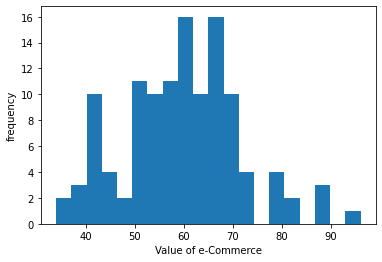

In [4]:
## Histogram of Value of e-Commerce
plt.hist(df1['3.2.7) Value of e-Commerce / %'], bins=20)
plt.xlabel('Value of e-Commerce')
plt.ylabel('frequency')
plt.show()

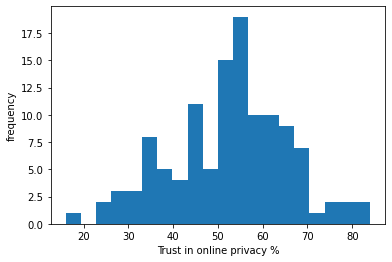

In [5]:
## Histogram of Trust in online privacy
plt.hist(df1['4.2.2) Trust in online privacy / %'],bins = 20)
plt.xlabel('Trust in online privacy %')
plt.ylabel('frequency')
plt.show()

To get a better sense of what each column represents we also wrote a loop which tells us about each of the columns from this dataset. 

In [6]:
for c in df1:
    col = df1[c]
    print(col.describe(),'\n\n')

count     118
unique    118
top        ID
freq        1
Name: ISO, dtype: object 


count           119
unique          119
top       Singapore
freq              1
Name: Country/Group, dtype: object 


count    119.000000
mean      58.017353
std       31.108138
min        0.300000
25%       24.950000
50%       67.700000
75%       85.900000
max      100.000000
Name: 1.1.1) Internet users / % of households, dtype: float64 


count    119.000000
mean      14.896832
std       13.869953
min        0.030000
25%        1.655000
50%       10.936000
75%       27.840000
max       44.770000
Name: 1.1.2) Fixed-line broadband subscribers / Per 100 inhabitants, dtype: float64 


count    119.000000
mean     106.683218
std       25.049091
min       37.200000
25%       95.800000
50%      115.000000
75%      129.950000
max      130.000000
Name: 1.1.3) Mobile subscribers / Per 100 inhabitants, dtype: float64 


count    119.000000
mean      13.117025
std       15.939568
min      -14.000000
25%        2.

### Data Refinement - Internet Data
Now we are going to refine the dataset so that it is easier to work with and understand. We changed many of the column names to be shorter and more relevant to our project.

In [7]:
## Remove up to the first ')'
new_cols1 = [c[c.find(')') + 2:].lower() for c in df1.columns]

In [8]:
## Replace spaces with underscores 
new_cols2 = [c.replace(' ', '_') for c in new_cols1]

In [9]:
## Add parenthesis around units
new_cols3 = [c[:c.find('/')] + '(' + c[c.find('/') + 2:] + ')' for c in new_cols2]
df1.columns = new_cols3
## Rename a single column
df1 = df1.rename(columns={"ountry(roup)":"country"})
df1.head()

,s(o),country,internet_users_(%_of_households),fixed-line_broadband_subscribers_(per_100_inhabitants),mobile_subscribers_(per_100_inhabitants),gender_gap_in_internet_access_(%_difference),gender_gap_in_mobile_phone_access_(%_difference),average_fixed_broadband_upload_speed_(kbps),average_fixed_broadband_download_speed_(kbps),average_fixed_broadband_latency_(ms),...,internet_users_(population)_(millions),offline_population_(millions),internet_access_gender_gap_(difference_in_percentage_points),mobile_phone_access_gender_gap_(difference_in_percentage_points),internet_users_(percent_of_population)_(%_of_population),male_internet_users_(%_of_male_population),female_internet_users_(%_of_female_population),male_mobile_phone_subscribers_(%_of_male_population),female_mobile_phone_subscribers_(%_of_female_population),total_fixed_line_broadband_subscribers_(number_of_subscriptions)
0,DZ,Algeria,74.4,7.26,121.9,21.7,7.3,2090.0,3990.0,64.0,...,25.16,17.07,13.0,6.0,59.6,60.0,47.0,82.0,76.0,3063835.0
1,AR,Argentina,75.9,19.10,130.0,-5.7,-3.6,7960.0,33960.0,31.0,...,32.64,11.29,-4.0,-3.0,74.3,70.0,74.0,83.0,86.0,8473655.0
2,AU,Australia,86.1,32.22,113.6,2.1,2.2,20030.0,42630.0,24.0,...,21.28,3.31,2.0,2.0,86.5,94.0,92.0,93.0,91.0,7922000.0
3,AT,Austria,88.8,28.35,123.5,2.2,-1.0,16920.0,55030.0,20.0,...,7.80,1.09,2.0,-1.0,87.7,91.0,89.0,96.0,97.0,2521000.0
4,AZ,Azerbaijan,78.2,18.20,103.9,15.0,11.5,23490.0,21200.0,31.0,...,7.94,2.01,12.0,11.0,79.8,80.0,68.0,96.0,85.0,1810474.0


In [10]:
## Subset the data to include fewer columns
internet_data = df1[['country','gender_gap_in_internet_access_(%_difference)','urban_electricity_access_(%_of_population)',
                 'rural_electricity_access_(%_of_population)', 'smartphone_cost_(handset)_(score_of_0-100,_100=most_affordable)', 
                 'level_of_web_accessibility_(qualitative_rating_0-4,_4=best)', 'trust_in_online_privacy_(%)',
                 'total_electricity_access_(%_of_population)', 'internet_access_gender_gap_(difference_in_percentage_points)', 
                 'internet_users_(percent_of_population)_(%_of_population)']]


In [21]:
## More Renaming 
internet_final = internet_data.rename(columns={'gender_gap_in_internet_access_(%_difference)':'gender_gap',
                                  'urban_electricity_access_(%_of_population)':'urban_elec_access',
                                  'rural_electricity_access_(%_of_population)':'rural_elec_access',
                                  'smartphone_cost_(handset)_(score_of_0-100,_100=most_affordable)':'phone_cost',
                                  'level_of_web_accessibility_(qualitative_rating_0-4,_4=best)':'web_access',
                                  'trust_in_online_privacy_(%)':'privacy_trust',
                                  'total_electricity_access_(%_of_population)':'electric_access',
                                  'internet_access_gender_gap_(difference_in_percentage_points)':'gender_gap_pt',
                                  'internet_users_(percent_of_population)_(%_of_population)':'internet_users',
                                  })
internet_final.to_csv("clean_internet.csv")
internet_final.head()

,country,gender_gap,urban_elec_access,rural_elec_access,phone_cost,web_access,privacy_trust,electric_access,gender_gap_pt,internet_users
0,Algeria,21.7,100.0,100.0,32.0,0.0,46.0,100.0,13.0,59.6
1,Argentina,-5.7,100.0,85.3,43.9,2.0,60.0,98.8,-4.0,74.3
2,Australia,2.1,100.0,100.0,93.6,2.0,52.0,100.0,2.0,86.5
3,Austria,2.2,100.0,100.0,68.8,2.0,58.0,100.0,2.0,87.7
4,Azerbaijan,15.0,100.0,100.0,22.7,1.0,39.0,100.0,12.0,79.8


### Data Exploration - Food Data 
The section above is the majority of the cleaning we did on the internet dataset. We will repeat a similar process for the food expenditure data as well. 

In [12]:
## Load food expenditure data
df2 = pd.read_csv('annual-food-expenditure-per-person-vs-gdp-per-capita.csv')
df2.head()

,Entity,Code,Year,"Total population (Gapminder, HYDE & UN)",Continent,GDP per capita (current US$),Food expenditure (USDA (2017))
0,Abkhazia,OWID_ABK,2015,NaN,Asia,NaN,NaN
1,Afghanistan,AFG,1800,3280000.0,NaN,NaN,NaN
2,Afghanistan,AFG,1801,3280000.0,NaN,NaN,NaN
3,Afghanistan,AFG,1802,3280000.0,NaN,NaN,NaN
4,Afghanistan,AFG,1803,3280000.0,NaN,NaN,NaN


/Users/spencerpettee/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/spencerpettee/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


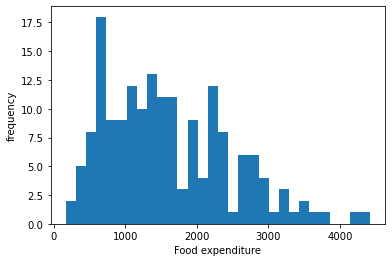

In [13]:
## Histogram of Food expenditure
plt.hist(df2['Food expenditure (USDA (2017))'], bins = 30)
plt.xlabel('Food expenditure')
plt.ylabel('frequency')
plt.show()

## The warning is due to the fact that we are not using clean data at this point.

In [14]:
## Looking at each column
for c in df2:
    col = df2[c]
    print(col.describe(),'\n\n')

count      49250
unique       338
top       Poland
freq         220
Name: Entity, dtype: object 


count     46149
unique      286
top         FIN
freq        220
Name: Code, dtype: object 


count    49250.000000
mean      1904.737360
std        312.412356
min     -10000.000000
25%       1861.000000
50%       1923.000000
75%       1976.000000
max       2019.000000
Name: Year, dtype: float64 


count    4.688300e+04
mean     2.982790e+07
std      2.530860e+08
min      9.050000e+02
25%      2.017335e+05
50%      1.542937e+06
75%      5.886795e+06
max      7.713468e+09
Name: Total population (Gapminder, HYDE & UN), dtype: float64 


count        285
unique         7
top       Europe
freq          75
Name: Continent, dtype: object 


count    1.177400e+04
mean     7.965823e+03
std      5.638515e+04
min      3.474143e+01
25%      4.735524e+02
50%      1.667922e+03
75%      6.650465e+03
max      5.559072e+06
Name: GDP per capita (current US$), dtype: float64 


count     172.000000
mean    

### Data Refinement - Food Data
Now we are going to refine the dataset so that it is easier to work with and understand. For this data set that mostly correlated to changing the names of columns and dropping some basic .

In [15]:
## Rename Columns and drop Nan
df2=df2.rename(columns={"Entity":"country", "Code":"Abreviation",
                        "Total population (Gapminder, HYDE & UN)":"Total Population",
                        "Food expenditure (USDA (2017))":"Food_Expenditure_2017", 
                        "GDP per capita (current US$)": "GDP"})

In [16]:
## Drop Nan Value
food_data = df2.dropna()
food_data.head()

,country,Abreviation,Year,Total Population,Continent,GDP,Food_Expenditure_2017
779,Algeria,DZA,2015,39728000.0,Africa,4160.220067,724.0
1850,Argentina,ARG,2015,43075000.0,South America,13698.293438,1737.0
2482,Australia,AUS,2015,23932000.0,Oceania,56561.412382,2915.0
2702,Austria,AUT,2015,8679000.0,Europe,44206.784282,2322.0
2923,Azerbaijan,AZE,2015,9623000.0,Asia,5500.310382,1210.0


### Combining the Data 
Since we used two datasets we decided to merge them so that it was easier to work with. Since both of the data files have a county column we it would be an appropriate to merge them on that column with a "right" merge. 

In [17]:
## Merge the datasets and drop excess columns
merged = pd.merge(internet_data, food_data, how ='right', on = ['country'])
merged = merged.drop(columns=['Abreviation','Year', 'Continent'].copy())

At this point we were fairly happy with how we had cleaned our data. However, we wanted to shorten up some of the column names again. 

In [18]:
## Drop Nan Value
food_data = df2.dropna()
food_data.head()

,country,Abreviation,Year,Total Population,Continent,GDP,Food_Expenditure_2017
779,Algeria,DZA,2015,39728000.0,Africa,4160.220067,724.0
1850,Argentina,ARG,2015,43075000.0,South America,13698.293438,1737.0
2482,Australia,AUS,2015,23932000.0,Oceania,56561.412382,2915.0
2702,Austria,AUT,2015,8679000.0,Europe,44206.784282,2322.0
2923,Azerbaijan,AZE,2015,9623000.0,Asia,5500.310382,1210.0


In [19]:
final = merged.rename(columns={'gender_gap_in_internet_access_(%_difference)':'gender_gap',
                                  'urban_electricity_access_(%_of_population)':'urban_elec_access',
                                  'rural_electricity_access_(%_of_population)':'rural_elec_access',
                                  'smartphone_cost_(handset)_(score_of_0-100,_100=most_affordable)':'phone_cost',
                                  'level_of_web_accessibility_(qualitative_rating_0-4,_4=best)':'web_access',
                                  'trust_in_online_privacy_(%)':'privacy_trust',
                                  'total_electricity_access_(%_of_population)':'electric_access',
                                  'internet_access_gender_gap_(difference_in_percentage_points)':'gender_gap_pt',
                                  'internet_users_(percent_of_population)_(%_of_population)':'internet_users',
                                  'Total Population':'total_population',
                                  'GDP':'GDP',
                                  'Food_Expenditure_2017':'food_expenditure'})
final.head()

,country,gender_gap,urban_elec_access,rural_elec_access,phone_cost,web_access,privacy_trust,electric_access,gender_gap_pt,internet_users,total_population,GDP,food_expenditure
0,Algeria,21.7,100.0,100.0,32.0,0.0,46.0,100.0,13.0,59.6,39728000.0,4160.220067,724.0
1,Argentina,-5.7,100.0,85.3,43.9,2.0,60.0,98.8,-4.0,74.3,43075000.0,13698.293438,1737.0
2,Australia,2.1,100.0,100.0,93.6,2.0,52.0,100.0,2.0,86.5,23932000.0,56561.412382,2915.0
3,Austria,2.2,100.0,100.0,68.8,2.0,58.0,100.0,2.0,87.7,8679000.0,44206.784282,2322.0
4,Azerbaijan,15.0,100.0,100.0,22.7,1.0,39.0,100.0,12.0,79.8,9623000.0,5500.310382,1210.0


In [20]:
final.to_csv("clean_data.csv")